# Modelling the recovery process using probability

Recall code from last time for $I_{n+1} = (1 + c) I_n = \lambda * I_n$:

In [1]:
function run_infection(I_0, λ, T=20)  # T=20 is default value

    I = zeros(T)
    I[1] = I_0

    for n in 1:T-1
        I[n+1] = λ * I[n]  
    end

    return I
end

run_infection (generic function with 2 methods)

In [5]:
run_infection(1.0, 1.1);

## Adding new data to extend a vector

In [6]:
v = [1.0]

1-element Array{Float64,1}:
 1.0

In [7]:
push!(v, 7.0)  # ! means: function `push!` modifies its first argument

2-element Array{Float64,1}:
 1.0
 7.0

In [8]:
length(v)

2

In [9]:
a = 1

v[3]

BoundsError: BoundsError: attempt to access 2-element Array{Float64,1} at index [3]

In [10]:
v

2-element Array{Float64,1}:
 1.0
 7.0

In [11]:
[v; 10]

3-element Array{Float64,1}:
  1.0
  7.0
 10.0

In [12]:
v

2-element Array{Float64,1}:
 1.0
 7.0

In [13]:
v2 = [v; 10]

3-element Array{Float64,1}:
  1.0
  7.0
 10.0

In [14]:
v2 = copy(v)

2-element Array{Float64,1}:
 1.0
 7.0

In [15]:
function run_infection(I_0, λ, T=20)  # T=20 is default value

    Is = [I_0]
    
    I = I_0   # current value of I

    for n in 1:T-1
        I_next = λ * I
        
        push!(Is, I_next)
    end

    return Is
end

run_infection (generic function with 2 methods)

In [23]:
run_infection(1.0, 1.1)

20-element Array{Float64,1}:
 1.0
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1
 1.1

In [16]:
function run_infection(I_0, λ, T=20)  # T=20 is default value

    Is = [I_0]
    I = I_0   # current value of I

    for n in 1:T-1
        I_next = λ * I
        
        push!(Is, I_next)
        
        I = I_next
    end
    
    return Is
end

run_infection (generic function with 2 methods)

In [17]:
run_infection(1.0, 1.1)

20-element Array{Float64,1}:
 1.0
 1.1
 1.2100000000000002
 1.3310000000000004
 1.4641000000000006
 1.6105100000000008
 1.771561000000001
 1.9487171000000014
 2.1435888100000016
 2.357947691000002
 2.5937424601000023
 2.853116706110003
 3.1384283767210035
 3.4522712143931042
 3.797498335832415
 4.177248169415656
 4.594972986357222
 5.054470284992944
 5.559917313492239
 6.115909044841463

In [18]:
v

2-element Array{Float64,1}:
 1.0
 7.0

In [19]:
pushfirst!(v, 8)   # deque - double-ended queue

3-element Array{Float64,1}:
 8.0
 1.0
 7.0

## Randomness

In [20]:
r = rand()

0.4359324605311583

In [21]:
r = rand()

0.8761819396217885

In [22]:
using Random

In [23]:
Random.seed!(3);

In [24]:
r = rand()

0.8116984049958615

In [25]:
r = rand()

0.9884323655013432

In [26]:
Random.seed!(3);  # mechanism to get repeatable sequences of random numbers

In [27]:
r = rand()

0.8116984049958615

In [28]:
r = rand()

0.9884323655013432

In [29]:
rand(10)

10-element Array{Float64,1}:
 0.8076220876500786
 0.9700908450487538
 0.14006111319509862
 0.5094438024440222
 0.05869740597593154
 0.004257960600515309
 0.9746379934512355
 0.5572251384524507
 0.4644219211852372
 0.2875090558291695

In [30]:
using Plots

In [31]:
r = rand(50);

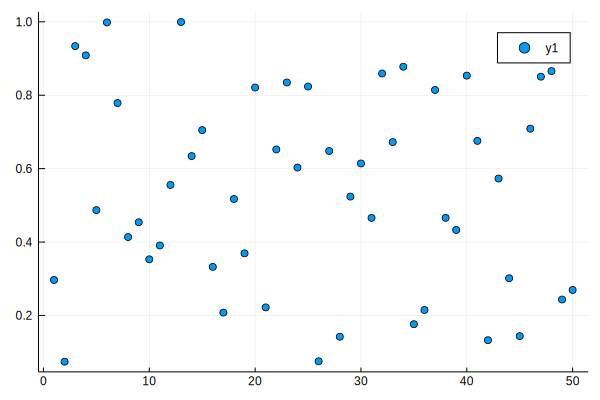

In [32]:
scatter(r)

In [33]:
one(0.5)

1.0

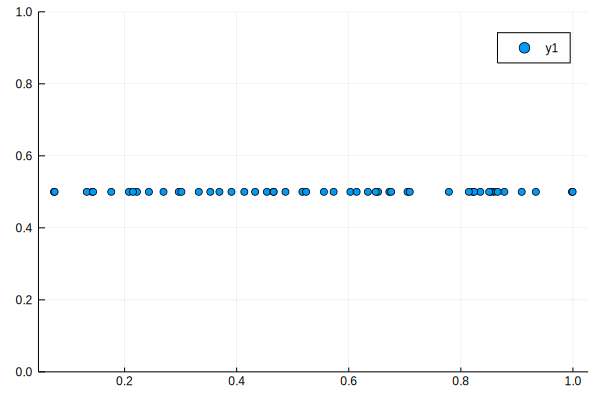

In [34]:
scatter(r, 0.5 .* one.(r), ylim=(0, 1))

In [37]:
using Interact

num_points = 100
r = rand(num_points)

@manipulate for n in 1:num_points
    scatter(r[1:n], 0.5 .* one.(r[1:n]), ylim=(0, 1), xlim=(0, 1))
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["n"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 100,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
50, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "C:\\Users\\chuan\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\chuan\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\chuan\\.julia\\packages\\InteractBase\\9mFwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\chuan\\.julia\\packages\\InteractBase\\9mFwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\chuan\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000013cb48b0, Task (runnable) @0x0000000013cb48b0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",

## Event with probability $p$

In [56]:
p = 0.25
r = rand()

if r < p
    true
else
    false
end

false

"Bernoulli trial"

In [57]:
function bernoulli(p)

    r = rand()

    if r < p
        return true
    else
        return false
    end
end

bernoulli (generic function with 1 method)

In [58]:
r < p ? true : false   # ternary operator

false

In [59]:
r < p

false

In [61]:
function bernoulli(p)

    r = rand()

    return r < p
end

bernoulli (generic function with 1 method)

In [62]:
p = 0.25
trials = [bernoulli(p) for i in 1:100];


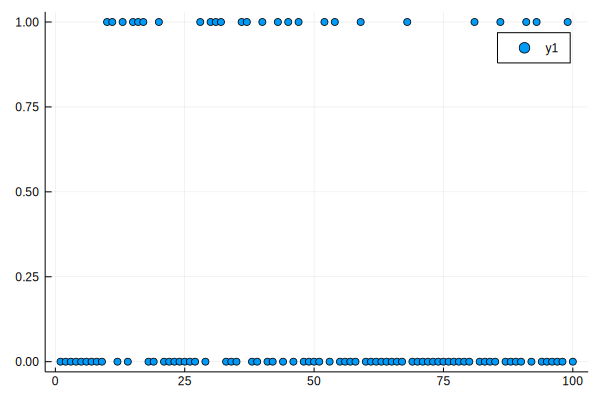

In [63]:
scatter(trials)

In [64]:
count(trials)

26

In [81]:
trials = [bernoulli(p) for i in 1:100];
count(trials)

19

In [82]:
trials = [bernoulli(p) for i in 1:100];
count(trials)

28

In [83]:
function bernoulli_experiment(p, N=100)
    trials = [bernoulli(p) for i in 1:N];
    return count(trials)
end

bernoulli_experiment (generic function with 2 methods)

In [84]:
count(trials .== false) + count(trials)

100

In [85]:
count(.!(trials))  # ! is not

72

In [86]:
bernoulli_experiment(0.25)

27

In [96]:
bernoulli_experiment(0.25)

25

A function which has different **outcomes** in different runs is called a **random variable**

## Monte Carlo simulation

Run the same random process a lot of times and look at the results

In [98]:
p = 0.25
N = 20   # num of trials
num_expts = 100 

results = [bernoulli_experiment(p, N) for i in 1:num_expts]

100-element Array{Int64,1}:
  7
  4
  6
  5
  2
  3
 10
  4
  6
  2
  1
  7
  6
  ⋮
 10
  3
  6
  1
  6
  5
  6
  3
  5
  6
  3
  6

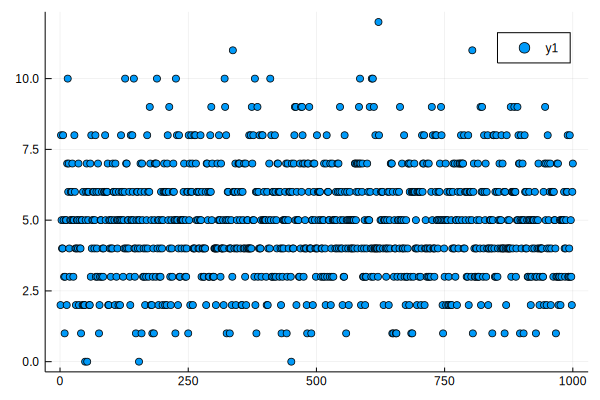

In [99]:
num_expts = 1000
results = [bernoulli_experiment(p, N) for i in 1:num_expts]
scatter(results)

$X$ = number of heads

**Probability distribution** of a random variable $X$

$\text{Prob}(X = x)$

Probability that $X = x$ = proportion of time that the result was $x$

## Counting

Need to count how many of the trials come out as 5

Need data structure where we store the counts:
- `Dict` (dictionary)
- `Vector`

In [100]:
results

1000-element Array{Int64,1}:
 2
 8
 5
 4
 4
 8
 5
 3
 1
 3
 5
 5
 2
 ⋮
 6
 8
 3
 3
 4
 8
 3
 5
 3
 2
 6
 7

In [101]:
maximum(results)   # not `max`:   max(1, 2, 3)

12

In [102]:
minimum(results)

0

In [103]:
l = maximum(results) + 1  # +1 is to store 0

13

In [104]:
counts = zeros(l);

In [105]:
for score in results[1:10]   # for i in 1:length(results)
    @show score
end

score = 2
score = 8
score = 5
score = 4
score = 4
score = 8
score = 5
score = 3
score = 1
score = 3


In [106]:
for score in results
    counts[score + 1] += 1   # increment by 1
end

In [107]:
counts

13-element Array{Float64,1}:
   4.0
  31.0
  75.0
 126.0
 196.0
 203.0
 165.0
 103.0
  59.0
  24.0
  11.0
   2.0
   1.0

In [108]:
counts = zeros(Int, maximum(results) + 1)

for score in results
    counts[score + 1] += 1   # increment by 1
end

In [109]:
counts

13-element Array{Int64,1}:
   4
  31
  75
 126
 196
 203
 165
 103
  59
  24
  11
   2
   1

In [110]:
]add LaTeXStrings

   Updating registry at `C:\Users\chuan\.julia\registries\General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  99.9 %[=>                                       ]  1.7 %                                      ]  3.6 %Fetching: [===>                                     ]  6.9 %10.2 %]  12.4 %14.9 %Fetching: [==========>                              ]  24.5 %26.3 %.2 %                           ]  31.4 %Fetching: [==============>                          ]  33.6 %Fetching: [===============>                         ]  36.6 %Fetching: [==================>                      ]  43.6 % [===================>                     ]  46.2 % [====================>                    ]  48.6 %>                   ]  52.1 % %=======================>                 ]  56.6 %>                ]  59.0 %]  60.9 %Fetching: [==========================>              ]  62.9 %.1 %]  68.3 %75.9 %.4 %]  82.7 %===================================>     ]  85.7 %    ]  88.2 %.1 %92.3 %Fetching: [======================================>  ]  94.3 % [=======================

  Resolving package versions...
  Installed Zlib_jll ────── v1.2.11+9
  Installed Bzip2_jll ───── v1.0.6+2
  Installed libass_jll ──── v0.14.0+1
  Installed LaTeXStrings ── v1.1.0
  Installed FreeType2_jll ─ v2.10.1+2
   Updating `C:\Users\chuan\.julia\environments\v1.4\Project.toml`
  [b964fa9f] + LaTeXStrings v1.1.0
   Updating `C:\Users\chuan\.julia\environments\v1.4\Manifest.toml`
  [6e34b625] ↑ Bzip2_jll v1.0.6+1 ⇒ v1.0.6+2
  [d7e528f0] ↑ FreeType2_jll v2.10.1+1 ⇒ v2.10.1+2
  [b964fa9f] + LaTeXStrings v1.1.0
  [83775a58] ↑ Zlib_jll v1.2.11+8 ⇒ v1.2.11+9
  [0ac62f75] ↑ libass_jll v0.14.0+0 ⇒ v0.14.0+1


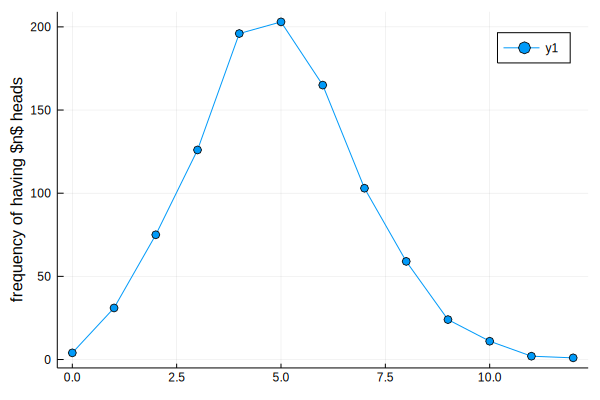

latex: failed to create a dvi file
latex: failed to create a dvi file
latex: failed to create a dvi file
latex: failed to create a dvi file


In [112]:
using LaTeXStrings

plot(0:maximum(results), counts, m=:o)
ylabel!(L"frequency of having $n$ heads")
xlabel!(L"n")

In [113]:
function count_them(results)

    counts = zeros(Int, maximum(results) + 1)

    for score in results
        counts[score + 1] += 1   # increment by 1
    end
    
    return counts
end

count_them (generic function with 1 method)

In [114]:
function run_experiments(p, N, num_expts=1000)
    results = [bernoulli_experiment(p, N) for i in 1:num_expts]
end

run_experiments (generic function with 2 methods)

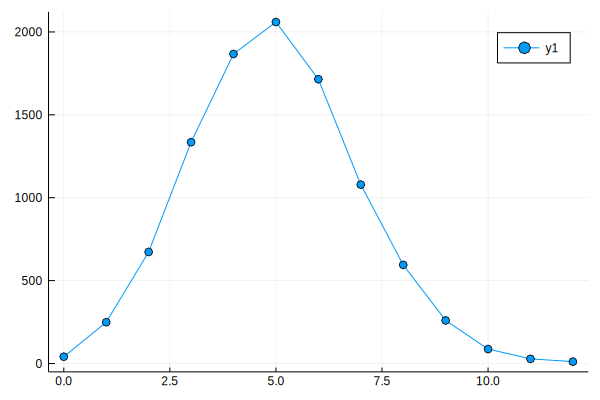

In [115]:
data = count_them(run_experiments(0.25, 20, 10000))
plot(0:length(data)-1, data, m=:o)

## Probability distribution

Probability = relative frequency

Divide by the number of experiments:

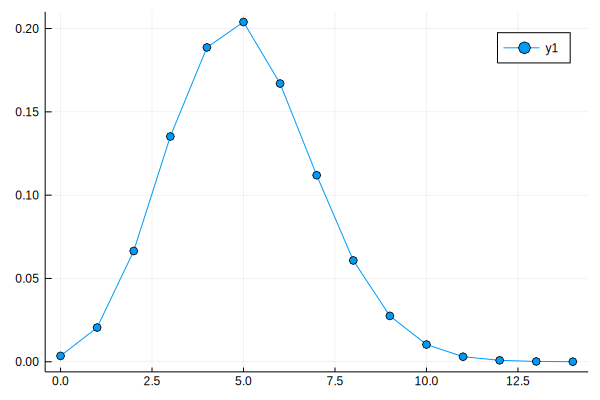

In [116]:
data = count_them(run_experiments(0.25, 20, 10^5))

plot(0:length(data)-1, data ./ sum(data), m=:o)

In [117]:
@time data = count_them(run_experiments(0.25, 20, 10^5))


  0.066244 seconds (100.00 k allocations: 11.444 MiB)


15-element Array{Int64,1}:
   327
  2045
  6730
 13490
 19168
 20330
 16855
 11070
  6011
  2602
   969
   302
    79
    20
     2

In [118]:
@time data = count_them(run_experiments(0.25, 20, 10^6))

  0.650151 seconds (1.00 M allocations: 114.441 MiB, 4.14% gc time)


16-element Array{Int64,1}:
   3171
  21185
  67336
 133933
 189533
 202333
 168514
 111828
  61116
  27216
   9983
   2954
    694
    171
     28
      5

In [119]:
@time data = count_them(run_experiments(0.25, 20, 10^7))

  4.715441 seconds (10.00 M allocations: 1.118 GiB, 12.94% gc time)


17-element Array{Int64,1}:
   31825
  211202
  669644
 1339569
 1895085
 2023974
 1688078
 1122949
  608960
  270201
   99008
   29927
    7724
    1557
     262
      33
       2

In [120]:
num_expts = 10^5
data = count_them(run_experiments(0.25, 20, num_expts))

probs = data ./ num_expts

16-element Array{Float64,1}:
 0.00321
 0.02152
 0.06562
 0.13444
 0.18959
 0.20217
 0.16913
 0.11281
 0.05991
 0.0278
 0.00984
 0.00306
 0.00073
 0.00012
 3.0e-5
 2.0e-5

In [121]:
sum(probs)

0.9999999999999999

In [122]:
x = 3 // 4

3//4

In [123]:
typeof(x)

Rational{Int64}

In [124]:
x + x

3//2

In [125]:
probs = data .// num_expts

16-element Array{Rational{Int64},1}:
   321//100000
   269//12500
  3281//50000
  3361//25000
 18959//100000
 20217//100000
 16913//100000
 11281//100000
  5991//100000
   139//5000
   123//12500
   153//50000
    73//100000
     3//25000
     3//100000
     1//50000

In [126]:
sum(probs)

1//1

In [127]:
data

16-element Array{Int64,1}:
   321
  2152
  6562
 13444
 18959
 20217
 16913
 11281
  5991
  2780
   984
   306
    73
    12
     3
     2

In [128]:
mean(data)

UndefVarError: UndefVarError: mean not defined

In [129]:
using Statistics

In [130]:
results = run_experiments(0.25, 20, 10^5);

In [131]:
mean(results)  # N=20 trials, p=0.25   

5.00262

Expected mean value = N * p